In [4]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed

# Make some random uniform sorted data:

np.random.seed(13)

n = 100
xmin = 0
ymin = 0
xmax = 1
ymax = 1
error = 0.05

row = np.random.uniform(xmin, xmax, n)
col = np.random.uniform(ymin, ymax, n)

sort_inds_row = np.argsort(row) 
sort_inds_col = np.argsort(col)

x = row[sort_inds_row]
y = col[sort_inds_col]

# Definition of Franke function:

def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4 + error*np.random.randn(n,xmax)

# Double letters refer to meshgrid data, needed for plotting

xx, yy = np.meshgrid(x, y)
zz = FrankeFunction(xx,yy)

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Ordinary least squares:

# Setting up the design matrices for 3rd, 4th and 5th order Polynomial:

poly3 = PolynomialFeatures(degree=3)
Xdes3 = poly3.fit_transform(np.c_[xx.ravel(), yy.ravel()])

poly4 = PolynomialFeatures(degree=4)
Xdes4 = poly4.fit_transform(np.c_[xx.ravel(), yy.ravel()])

poly5 = PolynomialFeatures(degree=5)
Xdes5 = poly5.fit_transform(np.c_[xx.ravel(), yy.ravel()])

# Reshaping the zz to fit the data

z = zz.reshape(-1,1)

# Setting up the fitting functions

ols3 = LinearRegression()
ols3.fit(Xdes3,z)

ols4 = LinearRegression()
ols4.fit(Xdes4,z)

ols5 = LinearRegression()
ols5.fit(Xdes5,z)

# New data for testing and plotting the model:

n_row = 100
n_col = 100

ax_row = np.random.rand(n_row)
ax_col = np.random.rand(n_col)

sort_inds_row = np.argsort(ax_row)
sort_inds_col = np.argsort(ax_col)

ROW = ax_row[sort_inds_row]
COL = ax_col[sort_inds_col]

ROWp, COLp = np.meshgrid(ROW, COL)

X3plot = poly3.fit_transform(np.c_[ROWp.ravel(), COLp.ravel()])
X4plot = poly4.fit_transform(np.c_[ROWp.ravel(), COLp.ravel()])
X5plot = poly5.fit_transform(np.c_[ROWp.ravel(), COLp.ravel()])

# This evaluates the height associated for each pair of coordinate made from np.meshgrid

Zpredict3 = ols3.predict(X3plot)
Zpredict4 = ols4.predict(X4plot)
Zpredict5 = ols5.predict(X5plot)

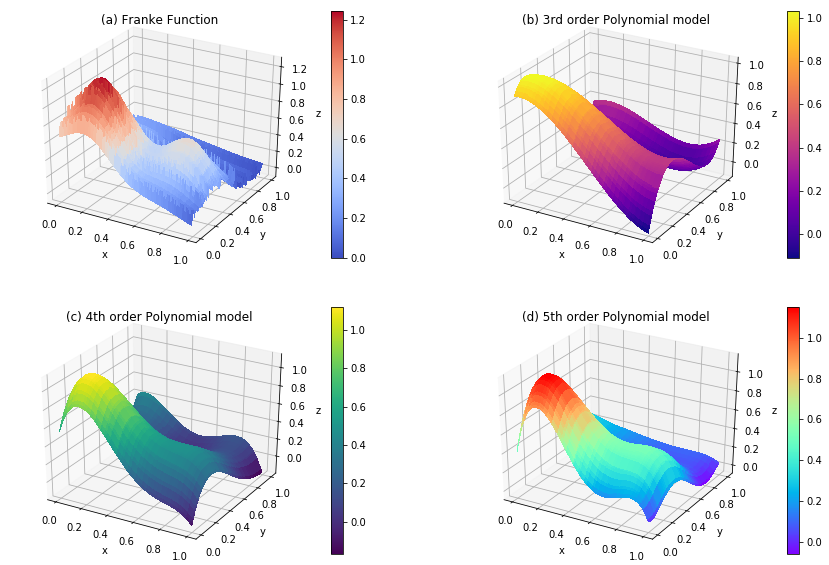

In [6]:
# Plot the generated surfaces for OLS models and original Franke Function.

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(2, 2, 1, projection='3d')
surf = ax.plot_surface(xx, yy, zz, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Customize the plot.
ax.set_title('(a) Franke Function')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
fig.colorbar(surf)


#fig3 = plt.figure()
ax3 = fig.add_subplot(2, 2, 2, projection='3d')
surf = ax3.plot_surface(ROWp, COLp, Zpredict3.reshape(*ROWp.shape), linewidth = 0, antialiased = False, cmap=cm.plasma)
ax3.set_title('(b) 3rd order Polynomial model')
ax3.set_xlabel("x")
ax3.set_ylabel("y")
ax3.set_zlabel("z")
fig.colorbar(surf)

ax4 = fig.add_subplot(2, 2, 3, projection='3d')
#fig4 = plt.figure()
surf = ax4.plot_surface(ROWp, COLp, Zpredict4.reshape(*ROWp.shape), linewidth = 0, antialiased = False, cmap=cm.viridis)
ax4.set_title('(c) 4th order Polynomial model')
ax4.set_xlabel("x")
ax4.set_ylabel("y")
ax4.set_zlabel("z")
fig.colorbar(surf)

#fig5 = plt.figure()
ax5 = fig.add_subplot(2, 2, 4, projection='3d')
surf = ax5.plot_surface(ROWp, COLp, Zpredict5.reshape(*ROWp.shape), linewidth = 0, antialiased = False, cmap=cm.rainbow)
ax5.set_title('(d) 5th order Polynomial model')
ax5.set_xlabel("x")
ax5.set_ylabel("y")
ax5.set_zlabel("z")
fig.colorbar(surf)

plt.show()

fig.savefig('Figure1.png')

In [11]:
# Evaluating the OLS models: variances, standard deviations, MSE and R2 scores:

from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error, mean_absolute_error

v_beta3 = np.diag(np.linalg.inv(Xdes3.T.dot(Xdes3)))
sigma3 = 1/(n-3-1) * np.sum((z-Zpredict3)**2)
var3 = v_beta3*sigma3
std3=var3**(0.5)
print('Variance of betas, 3rd order:', var3)
print('Standard deviations of betas, 3rd order:', std3)

v_beta4 = np.diag(np.linalg.inv(Xdes4.T.dot(Xdes4)))
sigma4 = 1/(n-4-1) * np.sum((z-Zpredict4)**2)
var4 = v_beta4*sigma4
std4=var4**(0.5)
print('Variance of betas, 4th order:', var4)
print('Standard deviations of betas, 4th order:', std4)

v_beta5 = np.diag(np.linalg.inv(Xdes5.T.dot(Xdes5)))
sigma5 = 1/(n-5-1) * np.sum((z-Zpredict5)**2)
var5 = v_beta5*sigma5
std5=var5**(0.5)
print('Variance of betas, 5th order:', var5)
print('Standard deviations of betas, 5th order:', std5)


print("Mean squared error, 3rd order:", mean_squared_error(z,Zpredict3))
print("Mean squared error, 4th order:", mean_squared_error(z,Zpredict4))
print("Mean squared error, 5th order:", mean_squared_error(z,Zpredict5))

print('R2 score 3rd order, 3rd order:', r2_score(z,Zpredict3))
print('R2 score 4th order, 4th order:', r2_score(z,Zpredict4))
print('R2 score 5th order, 5th order:', r2_score(z,Zpredict5))

Variance of betas, 3rd order: [0.00963692 0.26625829 0.32638012 1.08851264 0.75443147 1.27795501
 0.4424957  0.33792672 0.42470209 0.51943886]
Standard deviations of betas, 3rd order: [0.09816779 0.51600222 0.57129687 1.04331809 0.86858015 1.13046672
 0.6652035  0.58131465 0.65169172 0.72072107]
Variance of betas, 4th order: [2.04084549e-02 1.20171410e+00 1.45609236e+00 1.39290302e+01
 1.00552649e+01 1.65710388e+01 2.87863038e+01 1.67515961e+01
 1.80128639e+01 3.38140284e+01 7.10841475e+00 4.66444348e+00
 6.34171202e+00 5.17702231e+00 8.33914749e+00]
Standard deviations of betas, 4th order: [0.14285816 1.09622721 1.20668652 3.7321616  3.17100377 4.07075409
 5.36528692 4.09287138 4.24415645 5.81498309 2.66616105 2.15973227
 2.5182756  2.27530708 2.88775821]
Variance of betas, 5th order: [3.64304762e-02 4.03736599e+00 4.77120478e+00 9.84070412e+01
 7.38340838e+01 1.13907175e+02 5.34497013e+02 3.30674252e+02
 3.30632106e+02 5.94890110e+02 6.16805333e+02 3.65165710e+02
 3.60937709e+02 3.89

In [12]:
#Resampling the data: 
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

x_train, x_test, y_train, y_test, z_train, z_test = train_test_split(xx, yy, zz, test_size=0.25, random_state=42)

#print(z_train.shape, z_test.shape)

# Setting up the design matrices for train data

Xtrain3 = poly3.fit_transform(np.c_[x_train.ravel(), y_train.ravel()])

Xtrain4 = poly4.fit_transform(np.c_[x_train.ravel(), y_train.ravel()])

Xtrain5 = poly5.fit_transform(np.c_[x_train.ravel(), y_train.ravel()])

# Setting up the design matrices for test data

Xtest3 = poly3.fit_transform(np.c_[x_test.ravel(), y_test.ravel()])

Xtest4 = poly4.fit_transform(np.c_[x_test.ravel(), y_test.ravel()])

Xtest5 = poly5.fit_transform(np.c_[x_test.ravel(), y_test.ravel()])

#Fitting and predicting

ols3train = LinearRegression()
ols3train.fit(Xtrain3,z_train.ravel())
ptest3=ols3train.predict(Xtest3)

ols4train = LinearRegression()
ols4train.fit(Xtrain4,z_train.ravel())
ptest4=ols4train.predict(Xtest4)

ols5train = LinearRegression()
ols5train.fit(Xtrain5,z_train.ravel())
ptest5=ols5train.predict(Xtest5)

# Initialize a KFold instance
k = 5
kfold = KFold(n_splits = k)

#MSE for train data
estimated_mse_folds3 = cross_val_score(ols3train, Xtrain3,z_train.ravel(), scoring='neg_mean_squared_error', cv=kfold)
estimated_mse3= np.mean(-estimated_mse_folds3)

estimated_mse_folds4 = cross_val_score(ols4train, Xtrain4,z_train.ravel(), scoring='neg_mean_squared_error', cv=kfold)
estimated_mse4= np.mean(-estimated_mse_folds4)

estimated_mse_folds5 = cross_val_score(ols5train, Xtrain5,z_train.ravel(), scoring='neg_mean_squared_error', cv=kfold)
estimated_mse5= np.mean(-estimated_mse_folds5)

#MSE for test data
mse_test3=mean_squared_error(z_test.ravel(), ptest3)
mse_test4=mean_squared_error(z_test.ravel(), ptest4)
mse_test5=mean_squared_error(z_test.ravel(), ptest5)

#Printing MSE:
print('Mean squared error:')
print('Order of polynom|', 'Training|', 'Test|')
print("|%8i|%11f|%10f|" % \
      (3, estimated_mse3, mse_test3))
print("|%8i|%11f|%10f|" % \
      (4, estimated_mse4, mse_test4))
print("|%8i|%11f|%10f|" % \
      (5, estimated_mse5, mse_test5))

#R2 score for train data
estimated_r2_folds3 = cross_val_score(ols3train, Xtrain3,z_train.ravel(), scoring='r2', cv=kfold)
estimated_r2_3= np.mean(estimated_r2_folds3)

estimated_r2_folds4 = cross_val_score(ols4train, Xtrain4,z_train.ravel(), scoring='r2', cv=kfold)
estimated_r2_4= np.mean(estimated_r2_folds4)

estimated_r2_folds5 = cross_val_score(ols5train, Xtrain5,z_train.ravel(), scoring='r2', cv=kfold)
estimated_r2_5= np.mean(estimated_r2_folds5)

#R2 score for test data
r2_test3=r2_score(z_test.ravel(), ptest3)
r2_test4=r2_score(z_test.ravel(), ptest4)
r2_test5=r2_score(z_test.ravel(), ptest5)

#Printing R2 score:
print('R2 score:')
print('Order of polynom|', 'Training|', 'Test|')
print("|%8i|%11f|%10f|" % \
      (3, estimated_r2_3, r2_test3))
print("|%8i|%11f|%10f|" % \
      (4, estimated_r2_4, r2_test4))
print("|%8i|%11f|%10f|" % \
      (5, estimated_r2_5, r2_test5))


Mean squared error:
Order of polynom| Training| Test|
|       3|   0.011548|  0.011003|
|       4|   0.006854|  0.005584|
|       5|   0.004846|  0.004070|
R2 score:
Order of polynom| Training| Test|
|       3|   0.889596|  0.908368|
|       4|   0.933452|  0.953499|
|       5|   0.952398|  0.966108|


In [8]:
#Ridge method
from sklearn.linear_model import Ridge

# Define various lambda values to be tested
lmb_values = [0.0001, 0.001, 0.1, 10, 100, 1000]
num_values = len(lmb_values)

#Setting up empty matrices for train data

ridge3 = np.zeros((np.ma.size(z_test),num_values))
ridge4 = np.zeros((np.ma.size(z_test),num_values))
ridge5 = np.zeros((np.ma.size(z_test),num_values))

mse_matrix3=np.zeros(num_values)
mse_matrix4=np.zeros(num_values)
mse_matrix5=np.zeros(num_values)

r2_matrix3=np.zeros(num_values)
r2_matrix4=np.zeros(num_values)
r2_matrix5=np.zeros(num_values)


for i,lmb in enumerate(lmb_values):
    
    ##3rd order polynomial
    T3=Ridge(alpha=lmb,fit_intercept=False).fit(Xtrain3,z_train.ravel())
    ridge3[:,i] = T3.predict(Xtest3)
    #MSE for train data
    mse_folds3=cross_val_score(T3, Xtrain3,z_train.ravel(), scoring='neg_mean_squared_error', cv=kfold)
    mse3=np.mean(-mse_folds3)
    mse_matrix3[i]=mse3
    #R2 score for train data
    r2_folds3= cross_val_score(T3, Xtrain3,z_train.ravel(), scoring='r2', cv=kfold)
    r2_3=np.mean(r2_folds3)
    r2_matrix3[i]=r2_3
    
    ##4th order polynomial
    T4=Ridge(alpha=lmb,fit_intercept=False).fit(Xtrain4,z_train.ravel())
    ridge4[:,i] = T4.predict(Xtest4)
    #MSE for train data
    mse_folds4=cross_val_score(T4, Xtrain4,z_train.ravel(), scoring='neg_mean_squared_error', cv=kfold)
    mse4=np.mean(-mse_folds4)
    mse_matrix4[i]=mse4
    #R2 score for train data
    r2_folds4 = cross_val_score(T4, Xtrain4,z_train.ravel(), scoring='r2', cv=kfold)
    r2_4=np.mean(r2_folds4)
    r2_matrix4[i]=r2_4
    
    ##5th order polynomial
    T5=Ridge(alpha=lmb,fit_intercept=False).fit(Xtrain5,z_train.ravel())
    ridge5[:,i] = T5.predict(Xtest5)
    #MSE for train data
    mse_folds5=cross_val_score(T5, Xtrain5,z_train.ravel(), scoring='neg_mean_squared_error', cv=kfold)
    mse5=np.mean(-mse_folds5)
    mse_matrix5[i]=mse5
    #R2 score for train data
    r2_folds5=cross_val_score(T5, Xtrain5,z_train.ravel(), scoring='r2', cv=kfold)
    r2_5=np.mean(r2_folds5)
    r2_matrix5[i]=r2_5
    
#Setting up empty matrices for test data

mse_test3=np.zeros(num_values)
mse_test4=np.zeros(num_values)
mse_test5=np.zeros(num_values)

r2_test3=np.zeros(num_values)
r2_test4=np.zeros(num_values)
r2_test5=np.zeros(num_values)

#MSE and R2 score for test data

for i,lmb in enumerate(lmb_values):
    mse_test3[i]=mean_squared_error(z_test.ravel(), ridge3[:,i])
    mse_test4[i]=mean_squared_error(z_test.ravel(), ridge4[:,i])
    mse_test5[i]=mean_squared_error(z_test.ravel(), ridge5[:,i])
    r2_test3[i]=r2_score(z_test.ravel(), ridge3[:,i])
    r2_test4[i]=r2_score(z_test.ravel(), ridge4[:,i])
    r2_test5[i]=r2_score(z_test.ravel(), ridge5[:,i])

fig2 = plt.figure(figsize=(15,5))
ax2 = fig2.add_subplot(1, 2, 1, projection='3d')
surf = ax2.plot_surface(xx, yy, zz, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Customize the plot.
ax2.set_title('Franke Function')
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_zlabel("z")
fig2.colorbar(surf)

fig5 = plt.figure()
ax5 = fig2.add_subplot(1, 2, 2, projection='3d')

surf = ax5.plot_surface(x_test, y_test, ridge5[:,1].reshape(*x_test.shape), linewidth = 0, antialiased = False, cmap=cm.terrain)
ax5.set_title('5th order Ridge method, lambda = 0.0001')
ax5.set_xlabel("x")
ax5.set_ylabel("y")
ax5.set_zlabel("z")
fig2.colorbar(surf)

fig2.savefig('Figure2.png')

##Printing MSE


print('Mean squared error for Ridge method')

#3rd order polynomial
print('3rd order polynomial')
print('lambda|','Training MSE|','Test MSE|')

for i,lmb in enumerate(lmb_values):
    print("|%9g|%11f|%10f|" % \
      (lmb, mse_matrix3[i], mse_test3[i]))

#4th order polynomial
print('4th order polynomial')
print('lambda|','Training MSE|','Test MSE|')

for i,lmb in enumerate(lmb_values):
    print("|%9g|%11f|%10f|" % \
      (lmb, mse_matrix4[i], mse_test4[i]))
    
#5th order polynomial
print('5th order polynomial')
print('lambda|','Training MSE|','Test MSE|')

for i,lmb in enumerate(lmb_values):
    print("|%9g|%11f|%10f|" % \
      (lmb, mse_matrix5[i], mse_test5[i]))
    
#Printing R2 score

print('R2 score for Ridge method')

#3rd order polynomial
print('3rd order polynomial')
print('lambda|','Training R2|','Test R2|')

for i,lmb in enumerate(lmb_values):
    print("|%9g|%11f|%10f|" % \
      (lmb, r2_matrix3[i], r2_test3[i]))

#4th order polynomial
print('4th order polynomial')
print('lambda|','Training R2|','Test R2|')

for i,lmb in enumerate(lmb_values):
    print("|%9g|%11f|%10f|" % \
      (lmb, r2_matrix4[i], r2_test4[i]))
    
#5th order polynomial
print('5th order polynomial')
print('lambda|','Training R2|','Test R2|')

for i,lmb in enumerate(lmb_values):
    print("|%9g|%11f|%10f|" % \
      (lmb, r2_matrix5[i], r2_test5[i]))

NameError: name 'z_test' is not defined

In [9]:
#Lasso method
from sklearn.linear_model import Lasso

# Define various lambda values to be tested
lmb_values = [0.0001, 0.001, 0.1, 10, 100, 1000]
num_values = len(lmb_values)

#Setting up empty matrices for train data

lasso3 = np.zeros((np.ma.size(z_test),num_values))
lasso4 = np.zeros((np.ma.size(z_test),num_values))
lasso5 = np.zeros((np.ma.size(z_test),num_values))

mse_matrix3=np.zeros(num_values)
mse_matrix4=np.zeros(num_values)
mse_matrix5=np.zeros(num_values)

r2_matrix3=np.zeros(num_values)
r2_matrix4=np.zeros(num_values)
r2_matrix5=np.zeros(num_values)


for i,lmb in enumerate(lmb_values):
    
    ##3rd order polynomial
    T3=Lasso(alpha=lmb,fit_intercept=False).fit(Xtrain3,z_train.ravel())
    lasso3[:,i] = T3.predict(Xtest3)
    #MSE for train data
    mse_folds3=cross_val_score(T3, Xtrain3,z_train.ravel(), scoring='neg_mean_squared_error', cv=kfold)
    mse3=np.mean(-mse_folds3)
    mse_matrix3[i]=mse3
    #R2 score for train data
    r2_folds3= cross_val_score(T3, Xtrain3,z_train.ravel(), scoring='r2', cv=kfold)
    r2_3=np.mean(r2_folds3)
    r2_matrix3[i]=r2_3
    
    ##4th order polynomial
    T4=Lasso(alpha=lmb,fit_intercept=False).fit(Xtrain4,z_train.ravel())
    lasso4[:,i] = T4.predict(Xtest4)
    #MSE for train data
    mse_folds4=cross_val_score(T4, Xtrain4,z_train.ravel(), scoring='neg_mean_squared_error', cv=kfold)
    mse4=np.mean(-mse_folds4)
    mse_matrix4[i]=mse4
    #R2 score for train data
    r2_folds4 = cross_val_score(T4, Xtrain4,z_train.ravel(), scoring='r2', cv=kfold)
    r2_4=np.mean(r2_folds4)
    r2_matrix4[i]=r2_4
    
    ##5th order polynomial
    T5=Lasso(alpha=lmb,fit_intercept=False).fit(Xtrain5,z_train.ravel())
    lasso5[:,i] = T5.predict(Xtest5)
    #MSE for train data
    mse_folds5=cross_val_score(T5, Xtrain5,z_train.ravel(), scoring='neg_mean_squared_error', cv=kfold)
    mse5=np.mean(-mse_folds5)
    mse_matrix5[i]=mse5
    #R2 score for train data
    r2_folds5=cross_val_score(T5, Xtrain5,z_train.ravel(), scoring='r2', cv=kfold)
    r2_5=np.mean(r2_folds5)
    r2_matrix5[i]=r2_5
    
#Setting up empty matrices for test data

mse_test3=np.zeros(num_values)
mse_test4=np.zeros(num_values)
mse_test5=np.zeros(num_values)

r2_test3=np.zeros(num_values)
r2_test4=np.zeros(num_values)
r2_test5=np.zeros(num_values)

#MSE and R2 score for test data

for i,lmb in enumerate(lmb_values):
    mse_test3[i]=mean_squared_error(z_test.ravel(), lasso3[:,i])
    mse_test4[i]=mean_squared_error(z_test.ravel(), lasso4[:,i])
    mse_test5[i]=mean_squared_error(z_test.ravel(), lasso5[:,i])
    r2_test3[i]=r2_score(z_test.ravel(), lasso3[:,i])
    r2_test4[i]=r2_score(z_test.ravel(), lasso4[:,i])
    r2_test5[i]=r2_score(z_test.ravel(), lasso5[:,i])



##Printing MSE


print('Mean squared error for Lasso method')

#3rd order polynomial
print('3rd order polynomial')
print('lambda|','Training MSE|','Test MSE|')

for i,lmb in enumerate(lmb_values):
    print("|%9g|%11f|%10f|" % \
      (lmb, mse_matrix3[i], mse_test3[i]))

#4th order polynomial
print('4th order polynomial')
print('lambda|','Training MSE|','Test MSE|')

for i,lmb in enumerate(lmb_values):
    print("|%9g|%11f|%10f|" % \
      (lmb, mse_matrix4[i], mse_test4[i]))
    
#5th order polynomial
print('5th order polynomial')
print('lambda|','Training MSE|','Test MSE|')

for i,lmb in enumerate(lmb_values):
    print("|%9g|%11f|%10f|" % \
      (lmb, mse_matrix5[i], mse_test5[i]))
    
#Printing R2 score

print('R2 score for Lasso method')

#3rd order polynomial
print('3rd order polynomial')
print('lambda|','Training R2|','Test R2|')

for i,lmb in enumerate(lmb_values):
    print("|%9g|%11f|%10f|" % \
      (lmb, r2_matrix3[i], r2_test3[i]))

#4th order polynomial
print('4th order polynomial')
print('lambda|','Training R2|','Test R2|')

for i,lmb in enumerate(lmb_values):
    print("|%9g|%11f|%10f|" % \
      (lmb, r2_matrix4[i], r2_test4[i]))
    
#5th order polynomial
print('5th order polynomial')
print('lambda|','Training R2|','Test R2|')

for i,lmb in enumerate(lmb_values):
    print("|%9g|%11f|%10f|" % \
      (lmb, r2_matrix5[i], r2_test5[i]))

C:\Users\Mau\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Mau\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Mau\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Mau\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the n

C:\Users\Mau\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Mau\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Mau\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Mau\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the n

Mean squared error for Lasso method
3rd order polynomial
lambda| Training MSE| Test MSE|
|   0.0001|   0.013337|  0.014980|
|    0.001|   0.022501|  0.025276|
|      0.1|   0.124494|  0.135924|
|       10|   0.317417|  0.350067|
|      100|   0.317417|  0.350067|
|     1000|   0.317417|  0.350067|
4th order polynomial
lambda| Training MSE| Test MSE|
|   0.0001|   0.012707|  0.013269|
|    0.001|   0.018145|  0.020174|
|      0.1|   0.124494|  0.135924|
|       10|   0.317417|  0.350067|
|      100|   0.317417|  0.350067|
|     1000|   0.317417|  0.350067|
5th order polynomial
lambda| Training MSE| Test MSE|
|   0.0001|   0.012942|  0.013078|
|    0.001|   0.017442|  0.019413|
|      0.1|   0.124494|  0.135924|
|       10|   0.317417|  0.350067|
|      100|   0.317417|  0.350067|
|     1000|   0.317417|  0.350067|
R2 score for Lasso method
3rd order polynomial
lambda| Training R2| Test R2|
|   0.0001|   0.873607|  0.875256|
|    0.001|   0.785860|  0.789509|
|      0.1|  -0.156325| -0.1